In [12]:
import sys
sys.path

['/home/nastya/jupyter/assignment_3',
 '/snap/jupyter/6/lib/python37.zip',
 '/snap/jupyter/6/lib/python3.7',
 '/snap/jupyter/6/lib/python3.7/lib-dynload',
 '',
 '/home/nastya/snap/jupyter/common/lib/python3.7/site-packages',
 '/snap/jupyter/6/lib/python3.7/site-packages',
 '/snap/jupyter/6/lib/python3.7/site-packages/IPython/extensions',
 '/home/nastya/snap/jupyter/6/.ipython']

In [13]:
sys.path.append('/home/nastya/anaconda3/lib/python3.7/site-packages')

In [14]:
sys.path

['/home/nastya/jupyter/assignment_3',
 '/snap/jupyter/6/lib/python37.zip',
 '/snap/jupyter/6/lib/python3.7',
 '/snap/jupyter/6/lib/python3.7/lib-dynload',
 '',
 '/home/nastya/snap/jupyter/common/lib/python3.7/site-packages',
 '/snap/jupyter/6/lib/python3.7/site-packages',
 '/snap/jupyter/6/lib/python3.7/site-packages/IPython/extensions',
 '/home/nastya/snap/jupyter/6/.ipython',
 '/home/nastya/anaconda3/lib/python3.7/site-packages']

In [1]:
import random
import string
import numpy as np

In [2]:
from PIL import Image, ImageDraw

In [3]:
def one_hot(x, length):
    return [1 if x==i else 0 for i in range(length)]

In [4]:
def get_word(c):
    words = ["pieslice", "ellipse", "none"]
    return (words[c], one_hot(c,len(words)))

In [5]:
cell_w = 32
cell_h = 32
grid_w = 2
grid_h = 2

In [8]:
for j in range(0,5000):
    img = Image.new('RGB', (grid_w*cell_w,grid_h*cell_h))
    d = ImageDraw.Draw(img)
    
    with open('Labels/%d.txt' % j,'w+') as f:
     
        for row in range(grid_w):
            for col in range(grid_h):

                (digits, cat) = get_word(random.randint(0,2))
                
                width1 = 15
                width2 = 20
                
                if(digits=='none'):
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]) )        
                    f.write('%d %d %d %d\n' % ( col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h ))
                    f.write('0\n') # confidence of object
                    print("None", (col,row), (col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h), 0)
                elif(digits=='pieslice'):
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    d.pieslice([x-width1/2, y-width1/2, x+width1/2, y+width1/2], start=30, end=330, fill=(255, 255, 0))
                    
#                     d.text((x-width/2, y-10/2), digits, fill=(255,255,255))
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width1, width1) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width1, width1), 1)
                    
                else:
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, min(67, (row+1)*cell_h))
                    
                    d.ellipse([x-width2/2, y-10/2, x+width2/2, y+10/2], fill=(255, 0, 0))
                    
#                     d.text((x-width/2, y-10/2), digits, fill=(255,255,255))
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width2, 10) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width2, 10), 1)
        
        f.write('---\n')

    img.save('Images/%d.PNG' % j)

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 12, 20, 10) 1
Objt (0, 1) (20, 37, 20, 10) 1
Objt (1, 1) (48, 50, 20, 10) 1
Objt (0, 0) (4, 25, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 32, 15, 15) 1
Objt (0, 0) (6, 5, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 49, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 9, 15, 15) 1
Objt (0, 1) (12, 38, 15, 15) 1
Objt (1, 1) (40, 37, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 4, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 0, 15, 15) 1
Objt (1, 0) (61, 13, 20, 10) 1
Objt (0, 1) (2, 42, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 41, 15, 15) 1
Objt (1, 1) (59, 35, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 26, 15, 15) 1
None (0, 1) (16.0, 48.0, 3

Objt (0, 0) (10, 17, 15, 15) 1
Objt (1, 0) (34, 0, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 63, 15, 15) 1
Objt (0, 0) (14, 17, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 44, 15, 15) 1
Objt (1, 1) (50, 52, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 23, 15, 15) 1
Objt (0, 1) (13, 63, 15, 15) 1
Objt (1, 1) (53, 48, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 22, 20, 10) 1
Objt (0, 1) (24, 32, 20, 10) 1
Objt (1, 1) (33, 35, 15, 15) 1
Objt (0, 0) (19, 5, 20, 10) 1
Objt (1, 0) (54, 2, 20, 10) 1
Objt (0, 1) (10, 43, 20, 10) 1
Objt (1, 1) (44, 41, 15, 15) 1
Objt (0, 0) (29, 21, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 47, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 16, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 5, 15, 15) 1
Objt (1, 0) (62, 19, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Obj

Objt (0, 0) (29, 21, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 43, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 49, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 0, 15, 15) 1
Objt (0, 1) (3, 57, 15, 15) 1
Objt (1, 1) (57, 35, 15, 15) 1
Objt (0, 0) (18, 28, 20, 10) 1
Objt (1, 0) (44, 29, 20, 10) 1
Objt (0, 1) (12, 63, 20, 10) 1
Objt (1, 1) (36, 33, 20, 10) 1
Objt (0, 0) (13, 15, 15, 15) 1
Objt (1, 0) (34, 0, 15, 15) 1
Objt (0, 1) (10, 42, 15, 15) 1
Objt (1, 1) (33, 36, 15, 15) 1
Objt (0, 0) (8, 29, 15, 15) 1
Objt (1, 0) (32, 8, 15, 15) 1
Objt (0, 1) (2, 55, 15, 15) 1
Objt (1, 1) (46, 33, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 53, 20, 10) 1
Objt (1, 1) (61, 39, 15, 15) 1
Objt (0, 0) (14, 30, 15, 15) 1
Objt (1, 0) (35, 27, 20, 10) 1
Objt (0, 1) (13, 46, 20, 10) 1
Objt (1, 1) (4

Objt (0, 0) (6, 12, 15, 15) 1
Objt (1, 0) (40, 15, 15, 15) 1
Objt (0, 1) (24, 32, 15, 15) 1
Objt (1, 1) (40, 42, 20, 10) 1
Objt (0, 0) (16, 24, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 57, 20, 10) 1
Objt (1, 1) (43, 33, 20, 10) 1
Objt (0, 0) (7, 15, 20, 10) 1
Objt (1, 0) (43, 15, 15, 15) 1
Objt (0, 1) (9, 62, 15, 15) 1
Objt (1, 1) (33, 56, 20, 10) 1
Objt (0, 0) (26, 7, 15, 15) 1
Objt (1, 0) (55, 30, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (36, 47, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 26, 20, 10) 1
Objt (0, 1) (14, 52, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 14, 15, 15) 1
Objt (1, 0) (49, 4, 20, 10) 1
Objt (0, 1) (5, 38, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 27, 15, 15) 1
Objt (1, 0) (35, 9, 20, 10) 1
Objt (0, 1) (9, 46, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 15, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34,

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 1, 20, 10) 1
Objt (0, 1) (7, 44, 20, 10) 1
Objt (1, 1) (57, 35, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 29, 20, 10) 1
Objt (0, 1) (18, 42, 15, 15) 1
Objt (1, 1) (35, 52, 20, 10) 1
Objt (0, 0) (6, 13, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 48, 20, 10) 1
Objt (1, 1) (52, 55, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (27, 34, 20, 10) 1
Objt (1, 1) (40, 46, 20, 10) 1
Objt (0, 0) (7, 30, 15, 15) 1
Objt (1, 0) (60, 8, 15, 15) 1
Objt (0, 1) (30, 44, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 42, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 13, 15, 15) 1
Objt (1, 0) (62, 28, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 48, 20, 10) 1
Objt (0, 0) (2, 7, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 7, 15, 15) 1
Objt (0, 1) (14, 60, 15, 15) 1
Objt (1, 1) (56, 63, 20, 10) 1
Objt (0, 0) (13, 9, 15, 15) 1
Objt (1, 0) (46, 14, 20, 10) 1
Objt (0, 1) (11, 54, 20, 10) 1
Objt (1, 1) (59, 48, 15, 15) 1
Objt (0, 0) (24, 21, 15, 15) 1
Objt (1, 0) (39, 30, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (48, 51, 15, 15) 1
Objt (0, 0) (29, 22, 20, 10) 1
Objt (1, 0) (35, 29, 15, 15) 1
Objt (0, 1) (13, 51, 20, 10) 1
Objt (1, 1) (53, 47, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 18, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 50, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 6, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 23, 15, 15) 1
Objt (1, 0) (52, 19, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 59, 15, 15) 1
Objt (0, 0) (28, 8, 20, 10) 1
Objt (1, 0) (37, 4, 15, 15) 1
Objt (0, 1) (1, 52, 15, 15) 1
Objt (1, 1) (

Objt (0, 0) (25, 5, 15, 15) 1
Objt (1, 0) (46, 8, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (5, 13, 20, 10) 1
Objt (1, 0) (39, 30, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (24, 1, 15, 15) 1
Objt (1, 0) (43, 16, 15, 15) 1
Objt (0, 1) (20, 60, 15, 15) 1
Objt (1, 1) (55, 60, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (6, 39, 20, 10) 1
Objt (1, 1) (52, 43, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 23, 15, 15) 1
Objt (0, 1) (10, 41, 20, 10) 1
Objt (1, 1) (57, 62, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 39, 20, 10) 1
Objt (1, 1) (50, 38, 20, 10) 1
Objt (0, 0) (30, 27, 20, 10) 1
Objt (1, 0) (40, 16, 20, 10) 1
Objt (0, 1) (9, 62, 15, 15) 1
Objt (1, 1) (49, 43, 15, 15) 1
Objt (0, 0) (24, 4, 15, 15) 1
Objt (1, 0) (35, 7, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 23, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 34, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 11, 20, 10) 1
Objt (0, 1) (7, 56, 20, 10) 1
Objt (1, 1) (41, 51, 20, 10) 1
Objt (0, 0) (13, 9, 20, 10) 1
Objt (1, 0) (58, 4, 20, 10) 1
Objt (0, 1) (17, 60, 20, 10) 1
Objt (1, 1) (42, 61, 20, 10) 1
Objt (0, 0) (24, 28, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 45, 20, 10) 1
Objt (0, 0) (4, 22, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 40, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 3, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 61, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 9, 20, 10) 1
None (0, 1) (16.0, 4

Objt (0, 0) (13, 3, 20, 10) 1
Objt (1, 0) (44, 6, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 58, 15, 15) 1
Objt (1, 1) (38, 45, 20, 10) 1
Objt (0, 0) (16, 8, 15, 15) 1
Objt (1, 0) (57, 28, 20, 10) 1
Objt (0, 1) (18, 53, 15, 15) 1
Objt (1, 1) (32, 38, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 28, 15, 15) 1
Objt (0, 1) (23, 44, 15, 15) 1
Objt (1, 1) (62, 40, 15, 15) 1
Objt (0, 0) (3, 5, 15, 15) 1
Objt (1, 0) (33, 8, 15, 15) 1
Objt (0, 1) (19, 62, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 53, 15, 15) 1
Objt (1, 1) (35, 49, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 45, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (6, 52, 20, 1

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 27, 15, 15) 1
Objt (1, 0) (54, 3, 20, 10) 1
Objt (0, 1) (15, 52, 20, 10) 1
Objt (1, 1) (43, 57, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 14, 15, 15) 1
Objt (0, 1) (3, 44, 15, 15) 1
Objt (1, 1) (41, 62, 20, 10) 1
Objt (0, 0) (8, 28, 15, 15) 1
Objt (1, 0) (50, 25, 20, 10) 1
Objt (0, 1) (30, 63, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 14, 20, 10) 1
Objt (0, 1) (16, 58, 20, 10) 1
Objt (1, 1) (41, 58, 20, 10) 1
Objt (0, 0) (17, 12, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 47, 20, 10) 1
Objt (1, 1) (41, 37, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 16, 15, 15) 1
Objt (0, 1) (2, 33, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 9, 15, 15) 1
Objt (1, 0) (39, 7, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Ob

Objt (0, 0) (24, 17, 15, 15) 1
Objt (1, 0) (45, 4, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 32, 20, 10) 1
Objt (0, 0) (18, 29, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 54, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 6, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (53, 46, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 20, 20, 10) 1
Objt (0, 1) (25, 45, 20, 10) 1
Objt (1, 1) (55, 62, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 29, 15, 15) 1
Objt (0, 1) (20, 33, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 28, 15, 15) 1
Objt (1, 0) (56, 20, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 7, 20, 10) 1
Objt (1, 0) (57, 21, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 22, 20, 10) 1
Objt (1, 0) (52, 17, 20, 10) 1
Objt (0, 1) (17, 56, 15, 

Objt (0, 0) (8, 22, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 62, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 5, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 38, 15, 15) 1
Objt (1, 1) (34, 32, 20, 10) 1
Objt (0, 0) (2, 26, 20, 10) 1
Objt (1, 0) (62, 9, 20, 10) 1
Objt (0, 1) (3, 39, 20, 10) 1
Objt (1, 1) (49, 34, 20, 10) 1
Objt (0, 0) (24, 22, 20, 10) 1
Objt (1, 0) (41, 22, 15, 15) 1
Objt (0, 1) (8, 57, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 6, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 41, 20, 10) 1
Objt (0, 0) (26, 30, 20, 10) 1
Objt (1, 0) (46, 8, 15, 15) 1
Objt (0, 1) (30, 32, 20, 10) 1
Objt (1, 1) (36, 38, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 20, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
N

Objt (0, 0) (5, 17, 15, 15) 1
Objt (1, 0) (61, 6, 20, 10) 1
Objt (0, 1) (3, 50, 20, 10) 1
Objt (1, 1) (62, 59, 15, 15) 1
Objt (0, 0) (1, 21, 15, 15) 1
Objt (1, 0) (52, 25, 15, 15) 1
Objt (0, 1) (14, 62, 20, 10) 1
Objt (1, 1) (37, 40, 15, 15) 1
Objt (0, 0) (26, 9, 15, 15) 1
Objt (1, 0) (44, 12, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 46, 15, 15) 1
Objt (0, 0) (5, 21, 15, 15) 1
Objt (1, 0) (48, 4, 20, 10) 1
Objt (0, 1) (17, 52, 20, 10) 1
Objt (1, 1) (58, 46, 15, 15) 1
Objt (0, 0) (23, 3, 20, 10) 1
Objt (1, 0) (55, 14, 20, 10) 1
Objt (0, 1) (2, 62, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 13, 20, 10) 1
Objt (1, 0) (53, 2, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 57, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 30, 15, 15) 1
Objt (0, 1) (29, 32, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 51, 20, 10) 1
None (1, 1) (48.0, 48.

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 14, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 56, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (57, 28, 15, 15) 1
Objt (0, 1) (26, 42, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 7, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 4, 15, 15) 1
Objt (0, 1) (17, 33, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 13, 15, 15) 1
Objt (0, 1) (17, 45, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 0, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 43, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32)

Objt (0, 0) (19, 10, 20, 10) 1
Objt (1, 0) (57, 27, 20, 10) 1
Objt (0, 1) (26, 52, 15, 15) 1
Objt (1, 1) (34, 40, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 60, 20, 10) 1
Objt (1, 1) (33, 46, 20, 10) 1
Objt (0, 0) (27, 0, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 32, 20, 10) 1
Objt (1, 1) (58, 45, 15, 15) 1
Objt (0, 0) (14, 27, 20, 10) 1
Objt (1, 0) (54, 29, 15, 15) 1
Objt (0, 1) (0, 39, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 15, 20, 10) 1
Objt (1, 0) (33, 1, 15, 15) 1
Objt (0, 1) (9, 47, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 9, 15, 15) 1
Objt (0, 1) (15, 50, 15, 15) 1
Objt (1, 1) (58, 57, 15, 15) 1
Objt (0, 0) (15, 27, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 48, 15, 15) 1
Objt (0, 0) (10, 30, 20, 10) 1
Objt (1, 0) (57, 15, 20, 10) 1
Objt (0, 1) (8, 57, 15, 15) 1
Objt (1, 1) (

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 28, 20, 10) 1
Objt (0, 1) (25, 58, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 7, 15, 15) 1
Objt (1, 0) (62, 22, 20, 10) 1
Objt (0, 1) (0, 34, 15, 15) 1
Objt (1, 1) (49, 57, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 12, 20, 10) 1
Objt (0, 1) (11, 50, 15, 15) 1
Objt (1, 1) (63, 50, 15, 15) 1
Objt (0, 0) (16, 30, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 21, 15, 15) 1
Objt (0, 1) (11, 63, 20, 10) 1
Objt (1, 1) (60, 49, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 16, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 23, 15, 15) 1
Objt (1, 0) (55, 2, 20, 10) 1
Objt (0, 1) (20, 40, 20, 10) 1
Objt (1, 1) (44, 39, 15, 15) 1
Objt (0, 0) (21, 17, 20, 10) 1
Objt (1, 0) (48, 7, 20, 10) 1
Objt (0, 1) (6, 36, 20, 10) 1
Objt

Objt (0, 0) (21, 10, 20, 10) 1
Objt (1, 0) (56, 7, 15, 15) 1
Objt (0, 1) (3, 46, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 23, 15, 15) 1
Objt (0, 1) (22, 32, 20, 10) 1
Objt (1, 1) (56, 37, 15, 15) 1
Objt (0, 0) (15, 28, 20, 10) 1
Objt (1, 0) (36, 21, 15, 15) 1
Objt (0, 1) (9, 61, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 2, 15, 15) 1
Objt (1, 0) (63, 30, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 61, 15, 15) 1
Objt (0, 0) (0, 9, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 49, 15, 15) 1
Objt (1, 1) (53, 47, 20, 10) 1
Objt (0, 0) (14, 8, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 49, 20, 10) 1
Objt (0, 0) (24, 10, 20, 10) 1
Objt (1, 0) (36, 20, 15, 15) 1
Objt (0, 1) (28, 32, 15, 15) 1
Objt (1, 1) (58, 62, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 25, 15, 15) 1
Objt (0, 1) (1, 33, 20, 10) 1
None (1, 1) (48.0

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 28, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 60, 15, 15) 1
Objt (0, 0) (23, 25, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 58, 20, 10) 1
Objt (0, 0) (22, 10, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 52, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 54, 15, 15) 1
Objt (1, 1) (54, 37, 20, 10) 1
Objt (0, 0) (8, 3, 20, 10) 1
Objt (1, 0) (47, 19, 15, 15) 1
Objt (0, 1) (10, 46, 15, 15) 1
Objt (1, 1) (41, 48, 20, 10) 1
Objt (0, 0) (19, 24, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 61, 20, 10) 1
Objt (1, 1) (58, 56, 20, 10) 1
Objt (0, 0) (14, 13, 15, 15) 1
Objt (1, 0) (36, 15, 20, 10) 1
Objt (0, 1) (26, 53, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 11, 20, 10) 1
Objt (1, 0) (39, 1, 15, 15) 1
Objt (0, 1) (29, 58, 15, 15) 1
Obj

Objt (0, 0) (23, 10, 15, 15) 1
Objt (1, 0) (39, 15, 15, 15) 1
Objt (0, 1) (25, 49, 15, 15) 1
Objt (1, 1) (57, 39, 20, 10) 1
Objt (0, 0) (22, 22, 15, 15) 1
Objt (1, 0) (63, 7, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 41, 15, 15) 1
Objt (0, 0) (11, 31, 15, 15) 1
Objt (1, 0) (62, 10, 15, 15) 1
Objt (0, 1) (25, 35, 20, 10) 1
Objt (1, 1) (59, 63, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 16, 15, 15) 1
Objt (0, 1) (2, 49, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 23, 15, 15) 1
Objt (1, 0) (57, 2, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 60, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 24, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 34, 20, 10) 1
Objt (0, 0) (23, 16, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 52, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 10, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 45, 15, 15) 1
Objt (1

Objt (0, 0) (22, 15, 20, 10) 1
Objt (1, 0) (34, 2, 20, 10) 1
Objt (0, 1) (6, 53, 15, 15) 1
Objt (1, 1) (34, 35, 20, 10) 1
Objt (0, 0) (20, 3, 20, 10) 1
Objt (1, 0) (38, 20, 15, 15) 1
Objt (0, 1) (27, 62, 20, 10) 1
Objt (1, 1) (39, 63, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 10, 15, 15) 1
Objt (0, 1) (2, 35, 20, 10) 1
Objt (1, 1) (55, 34, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 13, 20, 10) 1
Objt (0, 1) (19, 54, 20, 10) 1
Objt (1, 1) (40, 55, 20, 10) 1
Objt (0, 0) (14, 25, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 33, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (1, 13, 20, 10) 1
Objt (1, 0) (63, 12, 20, 10) 1
Objt (0, 1) (5, 58, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 0, 15, 15) 1
Objt (1, 0) (34, 12, 15, 15) 1
Objt (0, 1) (3, 37, 15, 15) 1
Objt (1, 1) (54, 47, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 26, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 36,

Objt (0, 0) (5, 16, 15, 15) 1
Objt (1, 0) (47, 7, 15, 15) 1
Objt (0, 1) (1, 41, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 20, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 60, 15, 15) 1
Objt (1, 1) (57, 39, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (57, 15, 15, 15) 1
Objt (0, 1) (10, 36, 15, 15) 1
Objt (1, 1) (34, 44, 20, 10) 1
Objt (0, 0) (19, 16, 20, 10) 1
Objt (1, 0) (58, 26, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 17, 20, 10) 1
Objt (0, 1) (29, 44, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 26, 15, 15) 1
Objt (1, 0) (36, 8, 15, 15) 1
Objt (0, 1) (17, 53, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 35, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 59, 15, 

Objt (0, 0) (4, 19, 15, 15) 1
Objt (1, 0) (57, 12, 20, 10) 1
Objt (0, 1) (9, 37, 15, 15) 1
Objt (1, 1) (54, 38, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 5, 15, 15) 1
Objt (0, 1) (7, 40, 20, 10) 1
Objt (1, 1) (39, 38, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 31, 20, 10) 1
Objt (0, 1) (0, 52, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 28, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 39, 20, 10) 1
Objt (0, 0) (22, 6, 20, 10) 1
Objt (1, 0) (56, 20, 20, 10) 1
Objt (0, 1) (2, 44, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 19, 15, 15) 1
Objt (1, 0) (53, 0, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (54, 46, 15, 15) 1
Objt (0, 0) (30, 8, 15, 15) 1
Objt (1, 0) (55, 15, 15, 15) 1
Objt (0, 1) (25, 49, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 1, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (6, 56, 15, 15) 1
Objt (1, 1) (5

Objt (0, 0) (7, 3, 20, 10) 1
Objt (1, 0) (55, 9, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 19, 20, 10) 1
Objt (1, 0) (62, 20, 20, 10) 1
Objt (0, 1) (16, 57, 15, 15) 1
Objt (1, 1) (51, 53, 15, 15) 1
Objt (0, 0) (31, 19, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 54, 20, 10) 1
Objt (1, 1) (56, 59, 20, 10) 1
Objt (0, 0) (23, 11, 20, 10) 1
Objt (1, 0) (42, 18, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 36, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 3, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 45, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (37, 1, 20, 10) 1
Objt (0, 1) (1, 33, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 16, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 54, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 58, 20, 10)

Objt (0, 0) (30, 2, 15, 15) 1
Objt (1, 0) (59, 13, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 58, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 39, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 53, 20, 10) 1
Objt (1, 1) (49, 40, 20, 10) 1
Objt (0, 0) (0, 11, 15, 15) 1
Objt (1, 0) (39, 7, 20, 10) 1
Objt (0, 1) (17, 34, 15, 15) 1
Objt (1, 1) (51, 39, 20, 10) 1
Objt (0, 0) (0, 28, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 56, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 34, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 6, 20, 10) 1
Objt (1, 0) (46, 3, 15, 15) 1
Objt (0, 1) (30, 45, 15, 15) 1
Objt (1, 1) (33, 43, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 53, 15,

Objt (0, 0) (6, 9, 15, 15) 1
Objt (1, 0) (55, 20, 20, 10) 1
Objt (0, 1) (25, 39, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 29, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 32, 20, 10) 1
Objt (0, 0) (29, 21, 15, 15) 1
Objt (1, 0) (41, 28, 20, 10) 1
Objt (0, 1) (3, 42, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 5, 15, 15) 1
Objt (1, 0) (54, 7, 15, 15) 1
Objt (0, 1) (27, 55, 20, 10) 1
Objt (1, 1) (48, 48, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 1, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 35, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 24, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 43, 15, 15) 1
Objt (0, 0) (1, 13, 20, 10) 1
Objt (1, 0) (59, 25, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 16, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 

None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 45, 15, 15) 1
Objt (0, 0) (6, 5, 15, 15) 1
Objt (1, 0) (63, 10, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 0, 15, 15) 1
Objt (1, 0) (40, 18, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (31, 28, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 43, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 8, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 45, 15, 15) 1
Objt (1, 1) (49, 54, 20, 10) 1
Objt (0, 0) (10, 19, 15, 15) 1
Objt (1, 0) (32, 11, 20, 10) 1
Objt (0, 1) (13, 50, 20, 10) 1
Objt (1, 1) (36, 54, 20, 10) 1
Objt (0, 0) (2, 26, 20, 10) 1
Objt (1, 0) (59, 1, 20, 10) 1
Objt (0, 1) (21, 37, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 23, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 48, 15, 15) 1
Objt (0, 0) (1, 30, 20, 10) 1
Obj

Objt (0, 0) (31, 28, 15, 15) 1
Objt (1, 0) (61, 4, 20, 10) 1
Objt (0, 1) (29, 60, 15, 15) 1
Objt (1, 1) (38, 59, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 56, 15, 15) 1
Objt (1, 1) (59, 47, 20, 10) 1
Objt (0, 0) (11, 26, 20, 10) 1
Objt (1, 0) (63, 24, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 40, 15, 15) 1
Objt (0, 0) (6, 23, 20, 10) 1
Objt (1, 0) (33, 7, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 62, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 2, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (1, 13, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 45, 20, 10) 1
Objt (1, 1) (41, 49, 20, 10) 1
Objt (0, 0) (5, 0, 15, 15) 1
Objt (1, 0) (36, 22, 20, 10) 1
Objt (0, 1) (25, 35, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (31, 22, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Ob

Objt (0, 0) (21, 3, 20, 10) 1
Objt (1, 0) (57, 23, 20, 10) 1
Objt (0, 1) (25, 42, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 10, 15, 15) 1
Objt (1, 0) (40, 28, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 18, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 52, 20, 10) 1
Objt (1, 1) (40, 42, 15, 15) 1
Objt (0, 0) (6, 7, 15, 15) 1
Objt (1, 0) (57, 30, 20, 10) 1
Objt (0, 1) (5, 36, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 18, 15, 15) 1
Objt (0, 1) (17, 63, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 15, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 43, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 3, 20, 10) 1
Objt (0, 1) (26, 34, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 15, 15, 15) 1
Objt (1, 0) (54, 19, 20, 10) 1
Objt (0, 1) (24, 49, 20, 10) 1
N

Objt (0, 0) (28, 10, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 57, 20, 10) 1
Objt (1, 1) (48, 63, 15, 15) 1
Objt (0, 0) (11, 13, 15, 15) 1
Objt (1, 0) (48, 22, 15, 15) 1
Objt (0, 1) (31, 34, 20, 10) 1
Objt (1, 1) (53, 42, 15, 15) 1
Objt (0, 0) (10, 19, 20, 10) 1
Objt (1, 0) (46, 20, 20, 10) 1
Objt (0, 1) (11, 41, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 3, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 8, 15, 15) 1
Objt (0, 1) (12, 48, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 28, 20, 10) 1
Objt (1, 0) (55, 5, 15, 15) 1
Objt (0, 1) (26, 49, 20, 10) 1
Objt (1, 1) (54, 45, 20, 10) 1
Objt (0, 0) (9, 18, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (5, 34, 20, 10) 1
Objt (1, 1) (52, 54, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 24, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 32, 20, 10) 1
Objt (1, 1) (50, 61, 20, 10) 1
Objt (0, 0) (26, 5, 15, 15) 1
Objt (1, 0) (41, 27, 15, 15) 1
Objt (0, 1) (30, 41, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 16, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 50, 20, 10) 1
Objt (1, 1) (49, 61, 20, 10) 1
Objt (0, 0) (14, 3, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 48, 15, 15) 1
Objt (1, 1) (53, 59, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 5, 20, 10) 1
Objt (0, 1) (13, 55, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 2, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 55, 15, 15) 1
Objt (1, 1) (37, 34, 15, 15) 1
Objt (0, 0) (23, 7, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 48, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 9, 20, 10) 1
Objt (1, 0) (44, 1, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 31, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 61, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 48, 20, 10) 1
Objt (0, 0) (7, 29, 20, 10) 1
Objt (1, 0) (37, 18, 15, 15) 1
Objt (0, 1) (10, 35, 20, 10) 1
Objt (1, 1) (61, 58, 15, 15) 1
Objt (0, 0) (18, 1, 15, 15) 1
Objt (1, 0) (45, 7, 20, 10) 1
Objt (0, 1) (17, 51, 15, 15) 1
Objt (1, 1) (51, 58, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 35, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 48, 15, 15) 1
Objt (1, 1) (55, 50, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 50, 20, 10) 1
Objt (1, 1) (49, 38, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 23, 20, 10) 1
None (0, 1) (16.0, 48.

Objt (1, 0) (38, 12, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 45, 15, 15) 1
Objt (0, 0) (9, 25, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 45, 15, 15) 1
Objt (1, 1) (36, 38, 20, 10) 1
Objt (0, 0) (23, 10, 20, 10) 1
Objt (1, 0) (53, 26, 15, 15) 1
Objt (0, 1) (29, 34, 20, 10) 1
Objt (1, 1) (55, 32, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 7, 20, 10) 1
Objt (0, 1) (29, 63, 20, 10) 1
Objt (1, 1) (61, 37, 15, 15) 1
Objt (0, 0) (2, 25, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 31, 20, 10) 1
Objt (0, 1) (31, 63, 20, 10) 1
Objt (1, 1) (60, 62, 15, 15) 1
Objt (0, 0) (22, 24, 20, 10) 1
Objt (1, 0) (37, 22, 20, 10) 1
Objt (0, 1) (26, 40, 15, 15) 1
Objt (1, 1) (50, 38, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 29, 15, 15) 1
Objt (0, 1) (13, 60, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (

Objt (0, 0) (19, 12, 15, 15) 1
Objt (1, 0) (35, 14, 20, 10) 1
Objt (0, 1) (28, 62, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 1, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 38, 15, 15) 1
Objt (1, 1) (38, 46, 20, 10) 1
Objt (0, 0) (9, 20, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 50, 20, 10) 1
Objt (1, 1) (46, 53, 15, 15) 1
Objt (0, 0) (0, 16, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 38, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 17, 20, 10) 1
Objt (1, 0) (48, 9, 15, 15) 1
Objt (0, 1) (11, 34, 15, 15) 1
Objt (1, 1) (51, 42, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 17, 20, 10) 1
Objt (0, 1) (0, 51, 20, 10) 1
Objt (1, 1) (59, 33, 15, 15) 1
Objt (0, 0) (5, 28, 20, 10) 1
Objt (1, 0) (46, 5, 15, 15) 1
Objt (0, 1) (21, 33, 15, 15) 1
Objt (1

Objt (0, 0) (21, 12, 15, 15) 1
Objt (1, 0) (40, 24, 15, 15) 1
Objt (0, 1) (0, 62, 15, 15) 1
Objt (1, 1) (47, 46, 20, 10) 1
Objt (0, 0) (0, 8, 15, 15) 1
Objt (1, 0) (60, 28, 15, 15) 1
Objt (0, 1) (20, 41, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 52, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 10, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 36, 15, 15) 1
Objt (1, 1) (48, 47, 15, 15) 1
Objt (0, 0) (23, 0, 15, 15) 1
Objt (1, 0) (40, 4, 15, 15) 1
Objt (0, 1) (14, 54, 15, 15) 1
Objt (1, 1) (44, 46, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (59, 12, 20, 10) 1
Objt (0, 1) (9, 40, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 23, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 56, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 23, 15, 15) 1
Objt (1, 0) (57, 24, 15, 15) 1
Objt (0, 1) (24, 55, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 30, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 25, 20, 10) 1
Objt (1, 0) (53, 15, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 60, 20, 10) 1
Objt (0, 0) (4, 9, 20, 10) 1
Objt (1, 0) (55, 22, 15, 15) 1
Objt (0, 1) (25, 59, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 23, 15, 15) 1
Objt (0, 1) (0, 50, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 8, 15, 15) 1
Objt (1, 0) (37, 29, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 41, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 28, 15, 15) 1
Objt (0, 1) (29, 53, 15

Objt (0, 0) (18, 29, 15, 15) 1
Objt (1, 0) (43, 28, 20, 10) 1
Objt (0, 1) (13, 49, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 20, 15, 15) 1
Objt (1, 0) (60, 6, 20, 10) 1
Objt (0, 1) (2, 34, 15, 15) 1
Objt (1, 1) (44, 52, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 8, 20, 10) 1
Objt (0, 1) (15, 62, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 15, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 44, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 0, 20, 10) 1
Objt (1, 0) (63, 20, 20, 10) 1
Objt (0, 1) (15, 41, 15, 15) 1
Objt (1, 1) (59, 54, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 2, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 39, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 26, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 0, 20, 10) 1
Objt (1, 0) (45, 22, 20, 10) 1
Objt (0, 1) (28, 42, 20, 10) 1
Objt (1

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 22, 15, 15) 1
Objt (0, 1) (10, 63, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 56, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 7, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 51, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 13, 15, 15) 1
Objt (0, 1) (26, 32, 20, 10) 1
Objt (1, 1) (45, 49, 20, 10) 1
Objt (0, 0) (5, 22, 20, 10) 1
Objt (1, 0) (54, 27, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 29, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 63, 20, 10) 1
Objt (1, 1) (63, 41, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 28, 15, 15) 1
Objt (1, 0) (51, 12, 20, 10) 1
Objt (0, 1) (

Objt (0, 0) (28, 29, 15, 15) 1
Objt (1, 0) (35, 10, 15, 15) 1
Objt (0, 1) (21, 36, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 22, 20, 10) 1
Objt (0, 1) (18, 61, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 21, 20, 10) 1
Objt (1, 0) (50, 7, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 39, 20, 10) 1
Objt (0, 0) (7, 20, 20, 10) 1
Objt (1, 0) (35, 0, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 43, 15, 15) 1
Objt (0, 0) (27, 15, 15, 15) 1
Objt (1, 0) (47, 31, 15, 15) 1
Objt (0, 1) (16, 51, 20, 10) 1
Objt (1, 1) (33, 35, 15, 15) 1
Objt (0, 0) (14, 29, 15, 15) 1
Objt (1, 0) (33, 2, 20, 10) 1
Objt (0, 1) (14, 34, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 21, 15, 15) 1
Objt (1, 0) (52, 5, 20, 10) 1
Objt (0, 1) (5, 61, 15, 15) 1
Objt (1, 1) (43, 48, 15, 15) 1
Objt (0, 0) (21, 22, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (5

Objt (0, 0) (30, 3, 20, 10) 1
Objt (1, 0) (41, 30, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 60, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 9, 20, 10) 1
Objt (0, 1) (7, 33, 15, 15) 1
Objt (1, 1) (45, 62, 20, 10) 1
Objt (0, 0) (19, 16, 20, 10) 1
Objt (1, 0) (55, 0, 15, 15) 1
Objt (0, 1) (24, 37, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 1, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 51, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 24, 20, 10) 1
Objt (0, 1) (4, 37, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 19, 15, 15) 1
Objt (1, 0) (57, 2, 20, 10) 1
Objt (0, 1) (14, 59, 20, 10) 1
Objt (1, 1) (38, 51, 20, 10) 1
Objt (0, 0) (19, 20, 20, 10) 1
Objt (1, 0) (50, 11, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 5, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 59, 15, 15) 1
Objt (1, 

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 10, 20, 10) 1
Objt (0, 1) (4, 56, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 18, 20, 10) 1
Objt (1, 0) (36, 11, 20, 10) 1
Objt (0, 1) (10, 41, 20, 10) 1
Objt (1, 1) (37, 59, 20, 10) 1
Objt (0, 0) (7, 25, 15, 15) 1
Objt (1, 0) (61, 9, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 12, 15, 15) 1
Objt (1, 0) (37, 19, 15, 15) 1
Objt (0, 1) (19, 40, 15, 15) 1
Objt (1, 1) (50, 41, 15, 15) 1
Objt (0, 0) (13, 26, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 36, 20, 10) 1
Objt (1, 1) (51, 41, 20, 10) 1
Objt (0, 0) (14, 26, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 49, 20, 10) 1
Objt (1, 1) (43, 46, 20, 10) 1
Objt (0, 0) (31, 2, 20, 10) 1
Objt (1, 0) (45, 26, 20, 10) 1
Objt (0, 1) (0, 49, 20, 10) 1
Objt (1, 1) (53, 56, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 59, 20, 10) 1
Objt (1, 1) (5

Objt (0, 0) (14, 4, 20, 10) 1
Objt (1, 0) (40, 31, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 8, 15, 15) 1
Objt (1, 0) (54, 19, 20, 10) 1
Objt (0, 1) (12, 62, 20, 10) 1
Objt (1, 1) (33, 52, 20, 10) 1
Objt (0, 0) (9, 9, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 62, 15, 15) 1
Objt (1, 1) (52, 54, 20, 10) 1
Objt (0, 0) (24, 8, 15, 15) 1
Objt (1, 0) (58, 21, 15, 15) 1
Objt (0, 1) (13, 42, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (60, 28, 15, 15) 1
Objt (0, 1) (30, 62, 20, 10) 1
Objt (1, 1) (52, 56, 20, 10) 1
Objt (0, 0) (11, 9, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 60, 20, 10) 1
Objt (0, 0) (23, 6, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 57, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 31, 15, 15) 1
Objt (1, 0) (55, 2, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1

Objt (0, 0) (17, 8, 20, 10) 1
Objt (1, 0) (60, 12, 15, 15) 1
Objt (0, 1) (28, 48, 20, 10) 1
Objt (1, 1) (41, 61, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 26, 20, 10) 1
Objt (0, 1) (3, 43, 20, 10) 1
Objt (1, 1) (53, 45, 15, 15) 1
Objt (0, 0) (31, 16, 15, 15) 1
Objt (1, 0) (53, 18, 15, 15) 1
Objt (0, 1) (18, 60, 15, 15) 1
Objt (1, 1) (35, 42, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 8, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 63, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 21, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 49, 20, 10) 1
Objt (1, 1) (56, 41, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 16, 15, 15) 1
Objt (0, 1) (20, 34, 15, 15) 1
Objt (1, 1) (54, 48, 15, 15) 1
Objt (0, 0) (0, 20, 20, 10) 1
Objt (1, 0) (39, 13, 15, 15) 1
Objt (0, 1) (18, 57, 15, 15) 1
Objt (1,

Objt (0, 0) (14, 8, 20, 10) 1
Objt (1, 0) (35, 14, 15, 15) 1
Objt (0, 1) (25, 33, 15, 15) 1
Objt (1, 1) (52, 32, 15, 15) 1
Objt (0, 0) (1, 16, 15, 15) 1
Objt (1, 0) (48, 8, 15, 15) 1
Objt (0, 1) (5, 63, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 14, 15, 15) 1
Objt (1, 0) (58, 26, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 47, 20, 10) 1
Objt (0, 0) (2, 19, 20, 10) 1
Objt (1, 0) (46, 2, 15, 15) 1
Objt (0, 1) (3, 34, 20, 10) 1
Objt (1, 1) (47, 41, 15, 15) 1
Objt (0, 0) (16, 12, 20, 10) 1
Objt (1, 0) (33, 15, 15, 15) 1
Objt (0, 1) (10, 46, 20, 10) 1
Objt (1, 1) (34, 36, 15, 15) 1
Objt (0, 0) (11, 13, 20, 10) 1
Objt (1, 0) (62, 4, 20, 10) 1
Objt (0, 1) (29, 51, 15, 15) 1
Objt (1, 1) (46, 61, 20, 10) 1
Objt (0, 0) (28, 17, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 40, 15, 15) 1
Objt (1, 1) (45, 46, 20, 10) 1
Objt (0, 0) (5, 11, 20, 10) 1
Objt (1, 0) (52, 13, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 35, 15, 15) 1
Ob

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (36, 56, 15, 15) 1
Objt (0, 0) (26, 31, 20, 10) 1
Objt (1, 0) (59, 20, 15, 15) 1
Objt (0, 1) (4, 49, 15, 15) 1
Objt (1, 1) (35, 54, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 12, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 8, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 38, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 33, 20, 10) 1
Objt (1, 1) (58, 37, 15, 15) 1
Objt (0, 0) (5, 2, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 48, 15, 15) 1
Objt (1, 1) (63, 61, 15, 15) 1
Objt (0, 0) (27, 27, 15, 15) 1
Objt (1, 0) (59, 6, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (51, 25, 15, 15) 1
Objt (0, 1) (30, 54, 

Objt (0, 0) (17, 12, 15, 15) 1
Objt (1, 0) (60, 16, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 23, 20, 10) 1
Objt (0, 1) (18, 44, 20, 10) 1
Objt (1, 1) (34, 53, 20, 10) 1
Objt (0, 0) (20, 13, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 34, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 21, 20, 10) 1
Objt (0, 1) (4, 44, 20, 10) 1
Objt (1, 1) (49, 62, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 44, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 19, 20, 10) 1
Objt (1, 0) (45, 12, 15, 15) 1
Objt (0, 1) (23, 32, 15, 15) 1
Objt (1, 1) (60, 36, 20, 10) 1
Objt (0, 0) (13, 2, 20, 10) 1
Objt (1, 0) (44, 21, 20, 10) 1
Objt (0, 1) (6, 60, 20, 10) 1
Objt (1, 1) (39, 59, 20, 10) 1
Objt (0, 0) (18, 14, 20, 10) 1
Objt (1, 0) (37, 22, 15, 15) 1
Objt (0, 1) (22, 57, 20, 10) 1
Objt (

Objt (0, 0) (9, 12, 20, 10) 1
Objt (1, 0) (56, 7, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 13, 15, 15) 1
Objt (0, 1) (8, 49, 20, 10) 1
Objt (1, 1) (54, 33, 15, 15) 1
Objt (0, 0) (15, 22, 20, 10) 1
Objt (1, 0) (32, 28, 15, 15) 1
Objt (0, 1) (28, 62, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 16, 20, 10) 1
Objt (0, 1) (18, 32, 15, 15) 1
Objt (1, 1) (63, 42, 15, 15) 1
Objt (0, 0) (29, 23, 20, 10) 1
Objt (1, 0) (33, 29, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 20, 20, 10) 1
Objt (1, 0) (60, 12, 20, 10) 1
Objt (0, 1) (26, 40, 15, 15) 1
Objt (1, 1) (44, 32, 15, 15) 1
Objt (0, 0) (10, 20, 20, 10) 1
Objt (1, 0) (60, 1, 15, 15) 1
Objt (0, 1) (0, 62, 20, 10) 1
Objt (1, 1) (46, 45, 20, 10) 1
Objt (0, 0) (14, 19, 15, 15) 1
Objt (1, 0) (34, 1, 15, 15) 1
Objt (0, 1) (7, 43, 20, 10) 1
Objt (1, 1) (33, 5

Objt (0, 0) (7, 28, 15, 15) 1
Objt (1, 0) (44, 2, 15, 15) 1
Objt (0, 1) (24, 37, 15, 15) 1
Objt (1, 1) (54, 49, 20, 10) 1
Objt (0, 0) (5, 10, 15, 15) 1
Objt (1, 0) (52, 28, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 47, 15, 15) 1
Objt (0, 0) (17, 24, 15, 15) 1
Objt (1, 0) (41, 1, 20, 10) 1
Objt (0, 1) (18, 45, 15, 15) 1
Objt (1, 1) (40, 51, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 29, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 51, 15, 15) 1
Objt (0, 0) (21, 18, 20, 10) 1
Objt (1, 0) (48, 12, 20, 10) 1
Objt (0, 1) (20, 38, 20, 10) 1
Objt (1, 1) (51, 53, 15, 15) 1
Objt (0, 0) (1, 19, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 58, 15, 15) 1
Objt (1, 1) (35, 51, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (51, 10, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (36, 61, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 18, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) 

Objt (0, 0) (3, 16, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 40, 15, 15) 1
Objt (1, 1) (33, 44, 20, 10) 1
Objt (0, 0) (1, 16, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 35, 15, 15) 1
Objt (1, 1) (46, 63, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 30, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 52, 15, 15) 1
Objt (0, 0) (9, 10, 20, 10) 1
Objt (1, 0) (62, 17, 20, 10) 1
Objt (0, 1) (16, 56, 20, 10) 1
Objt (1, 1) (33, 44, 20, 10) 1
Objt (0, 0) (20, 10, 20, 10) 1
Objt (1, 0) (50, 16, 15, 15) 1
Objt (0, 1) (26, 47, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 20, 20, 10) 1
Objt (0, 1) (8, 50, 20, 10) 1
Objt (1, 1) (40, 37, 15, 15) 1
Objt (0, 0) (13, 17, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 53, 15, 15) 1
Objt (1, 1) (57, 34, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 43, 15, 15) 1
Objt (1,

Objt (0, 0) (21, 29, 20, 10) 1
Objt (1, 0) (36, 25, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 53, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 4, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 56, 20, 10) 1
Objt (0, 0) (31, 6, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 61, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 4, 20, 10) 1
Objt (0, 1) (13, 33, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 24, 20, 10) 1
Objt (1, 0) (42, 0, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 61, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 32, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 12, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 53, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 9, 15, 15) 1
None (0, 1) (16.0, 4

Objt (0, 0) (29, 31, 20, 10) 1
Objt (1, 0) (61, 30, 20, 10) 1
Objt (0, 1) (5, 33, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 20, 15, 15) 1
Objt (1, 0) (55, 10, 20, 10) 1
Objt (0, 1) (5, 51, 15, 15) 1
Objt (1, 1) (56, 47, 20, 10) 1
Objt (0, 0) (31, 7, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 3, 15, 15) 1
Objt (1, 0) (60, 18, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 33, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 14, 15, 15) 1
Objt (1, 0) (47, 2, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 57, 15, 15) 1
Objt (0, 0) (11, 26, 15, 15) 1
Objt (1, 0) (33, 5, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 58, 20, 10) 1
Objt (0, 0) (20, 5, 20, 10) 1
Objt (1, 0) (33, 17, 15, 15) 1
Objt (0, 1) (9, 38, 20, 10) 1
Obj

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 20, 20, 10) 1
Objt (0, 1) (19, 36, 20, 10) 1
Objt (1, 1) (60, 49, 15, 15) 1
Objt (0, 0) (17, 9, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 48, 20, 10) 1
Objt (1, 1) (40, 36, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 14, 20, 10) 1
Objt (0, 1) (11, 57, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 3, 20, 10) 1
Objt (1, 0) (42, 5, 20, 10) 1
Objt (0, 1) (0, 57, 20, 10) 1
Objt (1, 1) (57, 34, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 50, 15, 15) 1
Objt (1, 1) (47, 32, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 20, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 19, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 56, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (60, 28, 15, 15) 1
None (0, 1) (16.0, 48.0, 32,

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (37, 17, 15, 15) 1
Objt (0, 1) (20, 40, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 16, 15, 15) 1
Objt (1, 0) (52, 18, 15, 15) 1
Objt (0, 1) (17, 57, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 27, 20, 10) 1
Objt (1, 0) (49, 12, 20, 10) 1
Objt (0, 1) (16, 47, 20, 10) 1
Objt (1, 1) (56, 51, 20, 10) 1
Objt (0, 0) (17, 31, 20, 10) 1
Objt (1, 0) (60, 6, 15, 15) 1
Objt (0, 1) (25, 44, 20, 10) 1
Objt (1, 1) (61, 44, 15, 15) 1
Objt (0, 0) (7, 1, 20, 10) 1
Objt (1, 0) (32, 29, 20, 10) 1
Objt (0, 1) (24, 34, 20, 10) 1
Objt (1, 1) (55, 34, 20, 10) 1
Objt (0, 0) (1, 6, 15, 15) 1
Objt (1, 0) (60, 6, 20, 10) 1
Objt (0, 1) (31, 50, 15, 15) 1
Objt (1, 1) (60, 40, 15, 15) 1
Objt (0, 0) (9, 2, 20, 10) 1
Objt (1, 0) (36, 18, 15, 15) 1
Objt (0, 1) (10, 60, 15, 15) 1
Objt (1, 1) (36, 60, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 58, 15, 15) 1
Objt (1, 1) (45, 41, 20, 10) 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 35, 20, 10) 1
Objt (1, 1) (61, 38, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 21, 15, 15) 1
Objt (0, 1) (27, 51, 20, 10) 1
Objt (1, 1) (63, 57, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 42, 20, 10) 1
Objt (1, 1) (35, 32, 20, 10) 1
Objt (0, 0) (16, 30, 15, 15) 1
Objt (1, 0) (60, 1, 15, 15) 1
Objt (0, 1) (4, 47, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 5, 20, 10) 1
Objt (0, 1) (30, 37, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 30, 15, 15) 1
Objt (1, 0) (50, 11, 20, 10) 1
Objt (0, 1) (29, 56, 20, 10) 1
Objt (1, 1) (62, 62, 15, 15) 1
Objt (0, 0) (4, 0, 20, 10) 1
Objt (1, 0) (41, 4, 20, 10) 1
Objt (0, 1) (4, 37, 20, 10) 1
Objt (1, 1) (38, 32, 20, 10) 1
Objt (0, 0) (25, 24, 15, 15) 1
Objt (1, 0) (35, 15, 20, 10) 1
Objt (0, 1) (5, 48, 20, 10) 1
Objt (1, 1) (35, 

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 27, 20, 10) 1
Objt (0, 1) (14, 43, 20, 10) 1
Objt (1, 1) (52, 43, 20, 10) 1
Objt (0, 0) (21, 17, 20, 10) 1
Objt (1, 0) (35, 20, 15, 15) 1
Objt (0, 1) (8, 43, 15, 15) 1
Objt (1, 1) (37, 55, 15, 15) 1
Objt (0, 0) (26, 18, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 39, 15, 15) 1
Objt (1, 1) (52, 61, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 23, 15, 15) 1
Objt (0, 1) (3, 40, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 11, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 29, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 63, 20, 10) 1
Objt (1, 1) (52, 36, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 16, 15, 15) 1
Objt (0, 1) (25, 45, 15, 15) 1
Objt (1, 1) (33, 41, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 3

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 13, 15, 15) 1
Objt (0, 1) (12, 47, 20, 10) 1
Objt (1, 1) (48, 39, 20, 10) 1
Objt (0, 0) (5, 3, 15, 15) 1
Objt (1, 0) (51, 3, 15, 15) 1
Objt (0, 1) (16, 46, 20, 10) 1
Objt (1, 1) (41, 50, 20, 10) 1
Objt (0, 0) (2, 26, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 37, 15, 15) 1
Objt (0, 0) (10, 23, 15, 15) 1
Objt (1, 0) (52, 19, 15, 15) 1
Objt (0, 1) (7, 58, 15, 15) 1
Objt (1, 1) (48, 49, 15, 15) 1
Objt (0, 0) (26, 3, 20, 10) 1
Objt (1, 0) (62, 26, 15, 15) 1
Objt (0, 1) (8, 42, 20, 10) 1
Objt (1, 1) (44, 57, 15, 15) 1
Objt (0, 0) (10, 31, 15, 15) 1
Objt (1, 0) (56, 18, 20, 10) 1
Objt (0, 1) (0, 55, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (24, 9, 20, 10) 1
Objt (1, 0) (38, 4, 20, 10) 1
Objt (0, 1) (19, 45, 20, 10) 1
Objt (1, 1) (34, 57, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 4, 20, 10) 1
Objt (0, 1) (0, 54, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 53, 20, 10) 1
Objt (1, 1) (40, 38, 20, 10) 1
Objt (0, 0) (12, 11, 15, 15) 1
Objt (1, 0) (39, 9, 15, 15) 1
Objt (0, 1) (22, 54, 15, 15) 1
Objt (1, 1) (48, 35, 15, 15) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 13, 15, 15) 1
Objt (0, 1) (15, 58, 20, 10) 1
Objt (1, 1) (44, 47, 15, 15) 1
Objt (0, 0) (14, 21, 15, 15) 1
Objt (1, 0) (51, 18, 20, 10) 1
Objt (0, 1) (0, 50, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 23, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 49, 20, 10) 1
Objt (1, 1) (40, 62, 15, 15) 1
Objt (0, 0) (30, 6, 20, 10) 1
Objt (1, 0) (53, 15, 20, 10) 1
Objt (0, 1) (8, 49, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 19, 15, 15) 1
Objt (1, 0) (42, 10, 15, 15) 1
Objt (0, 1) (25, 34, 15, 15) 1
Objt (1, 1) (56, 55, 20, 10) 1
Objt (0, 0) (31, 29, 20, 10) 1
Objt (1, 0) (46, 24, 20, 10) 1
Objt (0, 1) (7, 37, 15, 15) 1
Objt (1, 1) (61, 45, 

Objt (0, 0) (23, 9, 15, 15) 1
Objt (1, 0) (61, 17, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 14, 20, 10) 1
Objt (1, 0) (32, 18, 20, 10) 1
Objt (0, 1) (13, 63, 15, 15) 1
Objt (1, 1) (53, 38, 15, 15) 1
Objt (0, 0) (28, 31, 20, 10) 1
Objt (1, 0) (34, 27, 20, 10) 1
Objt (0, 1) (29, 36, 20, 10) 1
Objt (1, 1) (35, 32, 20, 10) 1
Objt (0, 0) (0, 29, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 41, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 27, 15, 15) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 44, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 52, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (5, 10, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 44, 20, 10) 1
Objt (1, 1) (63, 59, 20, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 5, 20, 10) 1
None (0, 1) (16.0, 48.0, 32, 3

Objt (0, 0) (18, 11, 20, 10) 1
Objt (1, 0) (59, 26, 15, 15) 1
Objt (0, 1) (29, 42, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 25, 20, 10) 1
Objt (0, 1) (13, 32, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 16, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (29, 63, 20, 10) 1
Objt (1, 1) (56, 51, 15, 15) 1
Objt (0, 0) (10, 25, 20, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 48, 20, 10) 1
Objt (1, 1) (32, 38, 15, 15) 1
Objt (0, 0) (5, 26, 20, 10) 1
Objt (1, 0) (56, 14, 15, 15) 1
Objt (0, 1) (27, 39, 20, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 48, 15, 15) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (24, 8, 15, 15) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 13, 20, 10) 1
Objt (1, 0) (44, 28, 15, 15) 1
Objt (0, 1) (31, 37, 15, 

Objt (0, 0) (29, 23, 15, 15) 1
Objt (1, 0) (36, 18, 20, 10) 1
Objt (0, 1) (29, 51, 20, 10) 1
Objt (1, 1) (57, 41, 15, 15) 1


In [15]:

from __future__ import print_function
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D

In [16]:
from keras.layers.advanced_activations import LeakyReLU, PReLU

In [17]:
from keras import backend as K
from keras.models import load_model
import numpy as np
import sys
import cv2
import argparse

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [19]:
tf.config.run_functions_eagerly(True)

In [20]:
x_train = []
y_train = []

In [21]:
nb_boxes=1
grid_w=2
grid_h=2
cell_w=32
cell_h=32
img_w=grid_w*cell_w
img_h=grid_h*cell_h

In [22]:
#
# Read input image and output prediction
#
def load_image(j):
    img = cv2.imread('Images/%d.PNG' % j)
#    img = cv2.resize(img,(64,64))
    
    x_t = img_to_array(img)

    with open("Labels/%d.txt" % j, "r") as f:
        y_t = []
        for row in range(grid_w):
            for col in range(grid_h):
                c_t = [float(i) for i in f.readline().split()]
                [x, y, w, h] = [float(i) for i in f.readline().split()]        
                conf_t = [float(i) for i in f.readline().split()]                
                elt = []
                elt += c_t
                for b in range(nb_boxes):
                    elt += [x/cell_w, y/cell_h, w/img_w, h/img_h] + conf_t
                y_t.append(elt)
        assert(f.readline()=="---\n")
        
    return [x_t, y_t]


In [23]:
#
# Load all images and append to vector
# 
#for j in range(0, 10):
for j in range(10, 5000):
    [x,y] = load_image(j)
    x_train.append(x)
    y_train.append(y)

x_train = np.array(x_train)
y_train = np.array(y_train)


In [24]:
#
# Define the deep learning network
#

# model 2
i = Input(shape=(img_h,img_w,3))

x = Conv2D(16, (1, 1))(i)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3, 3))(x)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dense(grid_w*grid_h*(3+nb_boxes*5), activation='sigmoid')(x)
x = Reshape((grid_w*grid_h,(3+nb_boxes*5)))(x)

model = Model(i, x)


In [25]:
#
# The loss function orient the backpropagation algorithm toward the best direction.
#It does so by outputting a number. The larger the number, the further we are from a correct solution.
#Keras also accept that we output a tensor. In that case it will just sum all the numbers to get a single number.
# 
# y_true is training data
# y_pred is value predicted by the network
def custom_loss(y_true, y_pred):
    # define a grid of offsets
    # [[[ 0.  0.]]
    # [[ 1.  0.]]
    # [[ 0.  1.]]
    # [[ 1.  1.]]]
    grid = np.array([ [[float(x),float(y)]]*nb_boxes   for y in range(grid_h) for x in range(grid_w)])

    # first three values are classes : cat, rat, and none.
    # However yolo doesn't predict none as a class, none is everything else and is just not predicted
    # so I don't use it in the loss
    y_true_class = y_true[...,0:2]
    y_pred_class = y_pred[...,0:2] 

    # reshape array as a list of grid / grid cells / boxes / of 5 elements
    pred_boxes = K.reshape(y_pred[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    true_boxes = K.reshape(y_true[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    
    # sum coordinates of center of boxes with cell offsets.
    # as pred boxes are limited to 0 to 1 range, pred x,y + offset is limited to predicting elements inside a cell
    y_pred_xy   = pred_boxes[...,0:2] + K.variable(grid)
    # w and h predicted are 0 to 1 with 1 being image size
    y_pred_wh   = pred_boxes[...,2:4]
    # probability that there is something to predict here
    y_pred_conf = pred_boxes[...,4]

    # same as predicate except that we don't need to add an offset, coordinate are already between 0 and cell count
    y_true_xy   = true_boxes[...,0:2]
    # with and height
    y_true_wh   = true_boxes[...,2:4]
    # probability that there is something in that cell. 0 or 1 here as it's a certitude.
    y_true_conf = true_boxes[...,4]

    clss_loss  = K.sum(K.square(y_true_class - y_pred_class), axis=-1)
    xy_loss    = K.sum(K.sum(K.square(y_true_xy - y_pred_xy),axis=-1)*y_true_conf, axis=-1)
    wh_loss    = K.sum(K.sum(K.square(K.sqrt(y_true_wh) - K.sqrt(y_pred_wh)), axis=-1)*y_true_conf, axis=-1)

    # when we add the confidence the box prediction lower in quality but we gain the estimation of the quality of the box
    # however the training is a bit unstable

    # compute the intersection of all boxes at once (the IOU)
    intersect_wh = K.maximum(K.zeros_like(y_pred_wh), (y_pred_wh + y_true_wh)/2 - K.square(y_pred_xy - y_true_xy) )
    intersect_area = intersect_wh[...,0] * intersect_wh[...,1]
    true_area = y_true_wh[...,0] * y_true_wh[...,1]
    pred_area = y_pred_wh[...,0] * y_pred_wh[...,1]
    union_area = pred_area + true_area - intersect_area
    iou = intersect_area / union_area

    conf_loss = K.sum(K.square(y_true_conf*iou - y_pred_conf), axis=-1)

    # final loss function
    d = xy_loss + wh_loss + conf_loss + clss_loss
    
    if False:
        d = tf.Print(d, [d], "loss")
        d = tf.Print(d, [xy_loss], "xy_loss")
        d = tf.Print(d, [wh_loss], "wh_loss")
        d = tf.Print(d, [clss_loss], "clss_loss")
        d = tf.Print(d, [conf_loss], "conf_loss")
    
    return d

In [26]:
model = Model(i, x)


In [27]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss=custom_loss, optimizer=adam) # better

In [28]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        4640

/home/nastya/anaconda3/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/20
78/78 [==============================] - 49s 613ms/step - loss: 0.5076
Epoch 2/20
78/78 [==============================] - 40s 515ms/step - loss: 0.2569
Epoch 3/20
78/78 [==============================] - 49s 635ms/step - loss: 0.2085
Epoch 4/20
78/78 [==============================] - 41s 531ms/step - loss: 0.1765
Epoch 5/20
78/78 [==============================] - 52s 659ms/step - loss: 0.1563
Epoch 6/20
78/78 [==============================] - 41s 521ms/step - loss: 0.1367
Epoch 7/20
78/78 [==============================] - 43s 556ms/step - loss: 0.1238
Epoch 8/20
78/78 [==============================] - 39s 502ms/step - loss: 0.1123
Epoch 9/20
78/78 [==============================] - 33s 421ms/step - loss: 0.1027
Epoch 10/20
78/78 [==============================] - 33s 423ms/step - loss: 0.0942
Epoch 11/20
78/78 [==============================] - 33s 427ms/step - loss: 0.0857
Epoch 12/20
78/78 [==============================] - 32s 416ms/step - loss: 0.0788
Epoch 13/20
7

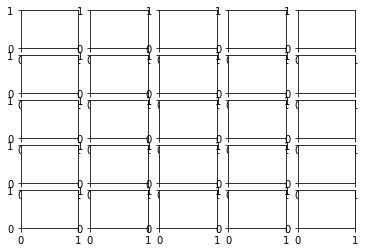

In [29]:
#
# Training the network
#
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('--train', help='train', action='store_true')
parser.add_argument('--epoch', help='epoch', const='int', nargs='?', default=10)
args, unknown = parser.parse_known_args()

model.fit(x_train, y_train, batch_size=64, epochs=20)
model.save_weights('weights_006.h5')

# if args.train:
#     model.fit(x_train, y_train, batch_size=64, epochs=5)
#     model.save_weights('weights_006.h5')
# else:
#     model.load_weights('weights_006.h5')

axes=[0 for _ in range(100)]
fig, axes = plt.subplots(5,5)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


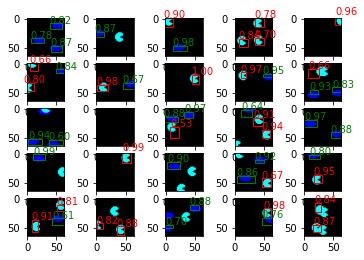

In [30]:
#
# Predict bounding box and classes for the first 25 images
#
for j in range(0,25):
    im = load_image(j)

    #
    # Predict bounding box and classes
    #
    img = cv2.imread('Images/%d.PNG' % j)
    #img = cv2.resize(img, (img_w,img_h))
    #data = img_to_array(img)
    P = model.predict(np.array([ img_to_array(img) ]))
 
    #
    # Draw each boxes and class score over each images using pyplot
    #
    col = 0
    for row in range(grid_w):
        for col in range(grid_h):
            p = P[0][col*grid_h+row]

            boxes = p[3:].reshape(nb_boxes,5)
            clss = np.argmax(p[0:2])
            
            ax = plt.subplot(5,5,j+1)
            imgplot = plt.imshow(img)

            i = 0
            for b in boxes:
                x = b[0]+float(row)
                y = b[1]+float(col)
                w = b[2]
                h = b[3]
                conf = b[4]
                if conf < 0.5:
                    continue

                color = ['r','g','b','0'][clss]
                rect = patches.Rectangle((x*cell_w-w/2*img_w, y*cell_h-h/2*img_h), w*img_h, h*img_h, linewidth=1,edgecolor=color,facecolor='none')
                ax.add_patch(rect)

                ax.text( (x*cell_w-w/2*img_w) / img_w, 1-(y*cell_h-h/2*img_h)/img_h-i*0.15, "%0.2f" % (conf), transform=ax.transAxes, color=color)
                i+=1

plt.show()